## **Cargar el conjunto de datos MNIST en Keras**

Carga cuatro imagenes; sus valores son de **0 - 9**


plt.subplot(filas columnas imagen)

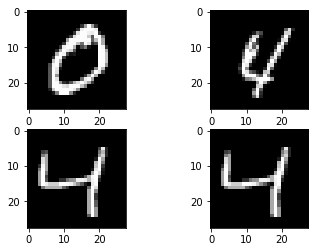

In [44]:
#Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# imagenes a dibujar
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray')) #primer valor
plt.subplot(222)
plt.imshow(X_train[700], cmap=plt.get_cmap('gray')) #segundo valor
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray')) #tercer valor
plt.subplot(224)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray')) #cuarto valor
plt.show()

## **Modelo de base con perceptrones multicapa**


**¿Realmete se necesita una red neuronal convolucional para obtener bueno resultados con MNITS?**

Es más sencillo utilizar una red neuronal simple que una red convolucional.



Para este ejemplo se utilizara un sencillo modelo de perceptrón de multiples capas que consigue una tasa de eror de 1.74%.


Este tambien require un vector que en este caso sera de 784 entradas.


La presicion utilizada por Keras es de 32 bits.

In [7]:
#importacion de clases y funciones que se utilizaran
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.utils import plot_model


# se fija un valor para el generador de numeros aleatorios
seed = 7
numpy.random.seed(seed)


# leer datos del archivo MNIST con Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# aplana la imagen 28*28 a un vector 784 para cada imagen.
# se reducen las necesidades de memoria, forzando la presicion de los valores de los pixeles a ser de 32 bits.
# shape devuelve la dimension de la matriz
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


'''
Los valores de los pixeles en escala de grises es de 0-255
Debido a que la escala es bien comportada, puede ser normalizada con valores de 0-1;
diviendo por el valor de 255
'''
X_train = X_train / 255
X_test = X_test / 255


#Se transforma el vector de enteros a una matriz binaria, para lo caul utilizamos np_utils.to_categorial() de Keras
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


#Modelo de una Red Neuronal
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    #Utiliza softmax para convertir los valores de salida en valores de probabilidad
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model, descenso por la gradiente (adam) se utiliza para aprender los pesos
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


# Construccion del modelo
model = baseline_model()
# Ajustando el modelo, 10 epocas, con 200 imagenes, 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Evaluacion final del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

plot_model(model, to_file='model2.png', show_shapes=True)

#Los datos de prueba se utilizan para evaluar el modelo y se imprime una tasa de error de clasifiacion

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
9s - loss: 0.2781 - acc: 0.9212 - val_loss: 0.1416 - val_acc: 0.9574
Epoch 2/10
8s - loss: 0.1116 - acc: 0.9675 - val_loss: 0.0921 - val_acc: 0.9706
Epoch 3/10
8s - loss: 0.0720 - acc: 0.9795 - val_loss: 0.0791 - val_acc: 0.9764
Epoch 4/10
8s - loss: 0.0506 - acc: 0.9857 - val_loss: 0.0737 - val_acc: 0.9769
Epoch 5/10
8s - loss: 0.0375 - acc: 0.9895 - val_loss: 0.0684 - val_acc: 0.9791
Epoch 6/10
8s - loss: 0.0270 - acc: 0.9925 - val_loss: 0.0627 - val_acc: 0.9803
Epoch 7/10
9s - loss: 0.0211 - acc: 0.9949 - val_loss: 0.0616 - val_acc: 0.9808
Epoch 8/10
8s - loss: 0.0142 - acc: 0.9967 - val_loss: 0.0628 - val_acc: 0.9800
Epoch 9/10
8s - loss: 0.0111 - acc: 0.9977 - val_loss: 0.0588 - val_acc: 0.9815
Epoch 10/10
9s - loss: 0.0078 - acc: 0.9986 - val_loss: 0.0569 - val_acc: 0.9819
Baseline Error: 1.81%


![](model2.png)

In [ ]:
#![](model2.png)